In [1]:
import os
import numpy as np
import glob
import sys
import pickle
from tqdm import notebook

from music21 import corpus, converter, instrument, note, chord
from utils import *
from generate import *
from model import create_network

import tensorflow
from tensorflow import keras

from tensorflow.keras.layers import LSTM, Input, Dropout, Dense, Activation, Embedding, Concatenate, Reshape
from tensorflow.keras.layers import Flatten, RepeatVector, Permute, TimeDistributed
from tensorflow.keras.layers import Multiply, Lambda, Softmax
from tensorflow.compat.v1.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.utils import plot_model

from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
with open('Pickle\\beethoven_mozart_n_d_v', 'rb') as f:
    ndv = pickle.load(f)
with open('Pickle\\beethoven_mozart_distincts', 'rb') as f:
    distincts = pickle.load(f)
with open('Pickle\\beethoven_mozart_lookups', 'rb') as f:
    lookups = pickle.load(f)
    
notes = ndv[0]
durations = ndv[1]
velocities = ndv[2]

network_input, network_output = prepare_sequences(notes, durations, velocities, lookups, distincts, 100)

notes, durations, velocities = ndv

note_to_int, int_to_note, duration_to_int, int_to_duration, velocity_to_int, int_to_velocity = lookups

n_notes = distincts[1]
n_durations = distincts[3]
n_velocities = distincts[5]
embed_size = 100
rnn_units = 512

model = create_network(n_notes, n_durations, n_velocities, embed_size, rnn_units)

weights_folder = 'Weights'
logs_base_dir = "Logs"
history_folder = "History"

callbacks_list = make_callbacks_list(weights_folder, logs_base_dir, history_folder)
model.load_weights(os.path.join(weights_folder, "weights.h5"))

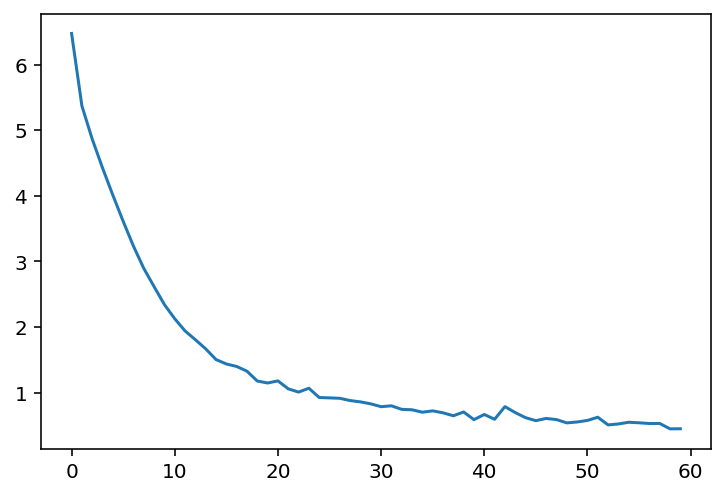

In [3]:
import pandas as pd
log_data = pd.read_csv(os.path.join(history_folder, 'model_history_log.csv'))
log_data['loss'].plot()

In [5]:
input_note_seq, input_duration_seq, input_velocity_seq = build_sequence(100, notes, durations, velocities)
whole_pattern, gen_pattern = generate_sequence(model, input_note_seq,
                                               input_duration_seq,
                                               input_velocity_seq,
                                               note_to_int,
                                               duration_to_int,
                                               velocity_to_int,
                                               100, 0.8)
midi_out_gen = create_midi(gen_pattern, int_to_note, int_to_duration, int_to_velocity)
write_midi(midi_out_gen)

whole_pattern, gen_pattern = generate_sequence(model, input_note_seq,
                                               input_duration_seq,
                                               input_velocity_seq,
                                               note_to_int,
                                               duration_to_int,
                                               velocity_to_int,
                                               100, 1.0)
midi_out_gen = create_midi(gen_pattern, int_to_note, int_to_duration, int_to_velocity)
write_midi(midi_out_gen)

whole_pattern, gen_pattern = generate_sequence(model, input_note_seq,
                                               input_duration_seq,
                                               input_velocity_seq,
                                               note_to_int,
                                               duration_to_int,
                                               velocity_to_int,
                                               100, 1.2)
midi_out_gen = create_midi(gen_pattern, int_to_note, int_to_duration, int_to_velocity)
write_midi(midi_out_gen)